# Coursework 2: Neural Networks 

This coursework covers the topics covered in class regarding neural networks for image classification.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note 1:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

**Note 2:** If you are using the virtual environment in the Computing Lab, please run the following command in the command line before opening jupyter-notebook and importing tensorflow. This will tell tensorflow where the Nvidia CUDA libariries are.

`export LD_LIBRARY_PATH=/vol/cuda/9.0.176/lib64/:"${LD_LIBRARY_PATH}}"` 

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import math
import itertools
from PIL import Image

Using TensorFlow backend.


## Question 1 (20 points)

Throughout this coursework you will be working with the Fashion-MNIST dataset. If you are interested, you may find relevant information regarding the dataset in this paper.

[1] Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Be sure that you have the following files in your working directory: data.tar.gz and reader.py. Loading the data can be done as follows:

`from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()`

The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-D vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

### 1.1 Load data (6 points)
Load the dataset and print the dimensions of the training set and the test set.

In [2]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()

print("Training dimensions:")
print(x_train.shape, y_train.shape)
print("Test dimensions:")
print(x_test.shape, y_test.shape)

Training dimensions:
(60000, 784) (60000,)
Test dimensions:
(10000, 784) (10000,)


### 1.2 Visualize data (6 points)
Visualise 3 training images (T-shirt, trousers and pullover) and 3 test images (dress, coat and sandal).

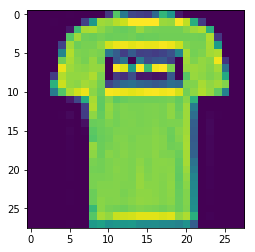

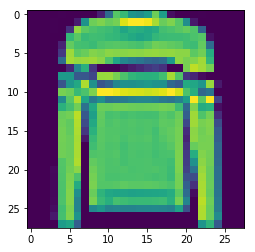

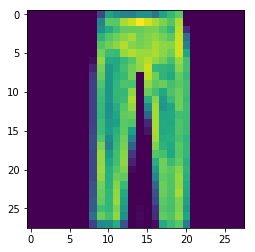

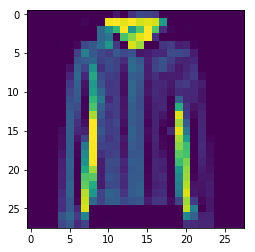

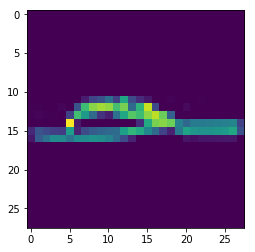

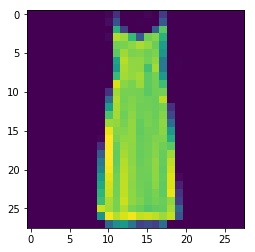

In [3]:
numTrain, _ = x_train.shape
numTest, _ = x_test.shape

x_train_reshaped = []
x_test_reshaped = []

trainSet = set([0,1,2])
testSet  = set([3,4,5])

#For square images only.
def reshape_vector(vector):
    length = vector.shape
    width = int(math.sqrt(length[0]))
    return np.reshape(vector, (-1, width))

#Reshapes vectors
for i in range(numTrain):
    x_train_reshaped.append(reshape_vector(x_train[i]))
    
for i in range(numTest):
    x_test_reshaped.append(reshape_vector(x_test[i]))
    
x_train_reshaped = np.asarray(x_train_reshaped)
x_test_reshaped = np.asarray(x_test_reshaped)

#Finds the first images matching the labels specified above.
i = 0
trainImageIndexes = []
while(len(trainSet) != 0):
    if y_train[i] in trainSet:
        trainImageIndexes.append(i)
        trainSet.remove(y_train[i])
    i += 1   

i = 0
testImageIndexes = []
while(len(testSet) != 0):
    if y_test[i] in testSet:
        testImageIndexes.append(i)
        testSet.remove(y_test[i])
    i += 1    

#Shows the images.    
for i in trainImageIndexes:
    plt.figure()
    plt.imshow(x_train_reshaped[i])
    
for i in testImageIndexes:
    plt.figure()
    plt.imshow(x_test_reshaped[i])    


### 1.3 Data balance (4 points)
Print out the number of training samples for each class.

In [4]:
classCountTrain = {}

#Init counts to zero.
for i in range(10):
    classCountTrain[i] = 0
    
#Calculate counts for each class.    
for i in y_train:
    classCountTrain[i] += 1
    
classes = {0: "T-shirt/top",
           1: "Trousers",
           2: "Pullover",
           3: "Dress",
           4: "Coat",
           5: "Sandal",
           6: "Shirt",
           7: "Sneaker",
           8: "Bag",
           9: "Ankle boot",}

for i in classCountTrain:
    print("Count of %s is: %d" % (classes[i], classCountTrain[i]))
  

Count of T-shirt/top is: 6000
Count of Trousers is: 6000
Count of Pullover is: 6000
Count of Dress is: 6000
Count of Coat is: 6000
Count of Sandal is: 6000
Count of Shirt is: 6000
Count of Sneaker is: 6000
Count of Bag is: 6000
Count of Ankle boot is: 6000


### 1.4 Discussion (4 points)
Is the dataset balanced? What would happen if the dataset is not balanced in the context of image classification? 

The data is balanced. If it was not, then the model would biased towards the classes with the higher counts. This is because the weights within the layers will be biased towards those classifications.

## Question 2 (40 points)

Build a neural network and train it with the Fashion-MNIST dataset. Here, we use the keras library, which is a high-level neural network library built upon tensorflow.

In [5]:
# Convert the label class into a one-hot representation
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 2.1 Build a multi-layer perceptron, also known as multi-layer fully connected network. You need to define the layers, the loss function, the optimiser and evaluation metric. (30 points)

In [16]:
model = keras.models.Sequential()
model.add(Dense(784, input_dim=784))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
activation_6 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total para

### 2.2 Define the optimisation parameters including the batch size and the number of epochs and then run the optimiser. (10 points)

We have tested that for an appropriate network architecture, on a personal laptop and with only CPU, it takes about a few seconds per epoch to train the network. For 100 epochs, it takes about a coffee break's time to finish the training. If you run it on a powerful GPU, it would be even much faster.

In [17]:
batch_size = 1000
epochs = 100
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
60000/60000 [==============================] - 3s 43us/step - loss: 11.9529 - acc: 0.2562
Epoch 2/100
60000/60000 [==============================] - 2s 40us/step - loss: 10.2057 - acc: 0.3652
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 9.8302 - acc: 0.3876
Epoch 4/100
60000/60000 [==============================] - 2s 39us/step - loss: 9.5592 - acc: 0.4043
Epoch 5/100
60000/60000 [==============================] - 2s 40us/step - loss: 9.2328 - acc: 0.4245
Epoch 6/100
60000/60000 [==============================] - 2s 40us/step - loss: 9.2450 - acc: 0.4242
Epoch 7/100
60000/60000 [==============================] - 2s 39us/step - loss: 9.1684 - acc: 0.4289
Epoch 8/100
60000/60000 [==============================] - 2s 39us/step - loss: 9.1549 - acc: 0.4292
Epoch 9/100
60000/60000 [==============================] - 2s 39us/step - loss: 9.1132 - acc: 0.4321
Epoch 10/100
60000/60000 [==============================] - 2s 39us/step - loss: 9.0124 -

## Question 3 (20 points) 

Evaluate the performance of your network with the test data. 
Visualize the performance using appropriate metrics and graphs (eg. confusion matrix). 
Comment on your per class performance and how it could be better.

In [18]:
# This function is provided for you to display the confusion matrix.
# For more information about the confusion matrix, you can read at
# https://en.wikipedia.org/wiki/Confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        
        cm: confusion matrix, default to be np.int32 data type
        classes: a list of the class labels or class names
        normalize: normalize the matrix so that each row amounts to one
        cmap: color map
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 3.1 Evaluate the classification accuracy on the test set (10 points)

10000/10000 [==============================] - 0s 14us/step
Loss value: 0.38922075629234315
Accuracy: 0.8785999983549118
Best guess for category: Ankle boot


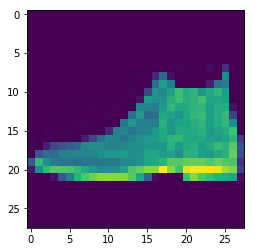

In [27]:
score = model.evaluate(x=x_test, y=y_test, batch_size=500)
print("Loss value: %s" % score[0])
print("Accuracy: %s" % score[1])
pre = model.predict(x=x_test[0:1])
category = np.argmax(pre)
print("Best guess for category: %s" % classes[category])
plt.imshow(x_test_reshaped[0])

### 3.2 Calculate and plot the confusion matrix (10 points)

Confusion matrix, without normalization
[[869.   3.  21.  41.   1.   0. 158.   0.   2.   0.]
 [  2. 975.   1.   6.   2.   0.   0.   0.   0.   0.]
 [ 10.   0. 779.  13.  79.   1.  75.   0.   4.   0.]
 [ 16.  13.  12. 871.  29.   1.  24.   0.   3.   0.]
 [  7.   4. 113.  28. 824.   0.  90.   0.   2.   0.]
 [  1.   0.   0.   0.   0. 945.   0.  12.   2.   9.]
 [ 85.   5.  70.  34.  59.   0. 634.   0.  11.   1.]
 [  1.   0.   0.   0.   0.  38.   0. 969.   4.  42.]
 [  9.   0.   4.   7.   6.   1.  19.   0. 972.   0.]
 [  0.   0.   0.   0.   0.  14.   0.  19.   0. 948.]]


ValueError: Unknown format code 'd' for object of type 'float'

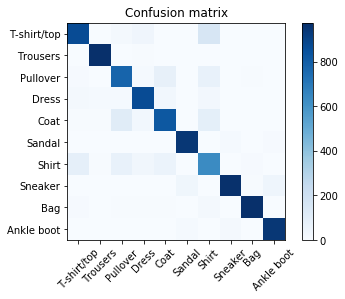

In [20]:
predictions = model.predict(x=x_test)
matrix = np.zeros((10, 10))

for i in range(len(predictions)):
    pre = predictions[i]
    guess = np.argmax(pre)
    real = y_test[i]
    actual = np.argmax(real)
    matrix[guess][actual] += 1
    
plot_confusion_matrix(matrix, list(classes.values()))    

- The x-axis is what the images actually are and the y-axis is the model's prediction. When the image is a shirt, the model sometimes predicts it as a coat, pullover or a t-shirt, which makes sense because these items of clothing are quite similar and have a torso shape.

## Question 4 (20 points)
Take two photos, one of your clothes or shoes that belongs to one of 10 classes, the other that does not belong to any class.

Use either Python or other software (Photoshop, Gimp, or any image editer) to convert the photos into grayscale, crop the region of interest and reshape into the size of 28x28.

### 4.1 Load and visualise your own images (6 points)

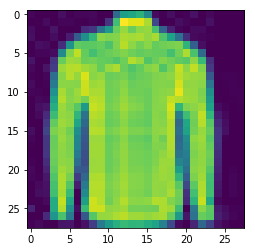

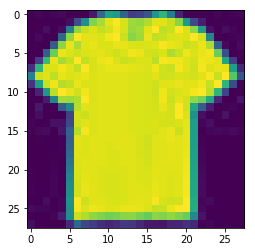

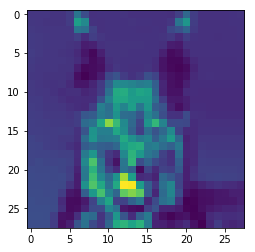

In [29]:
def getImageData(path):
    image = Image.open(path).convert('LA')
    data_rgb = np.array(image)
    length, _, _ = data_rgb.shape
    data = np.zeros((length, length))
    for row in range(length):
        for column in range(length):
            data[row][column] = 256 - data_rgb[row][column][0]
    return data        
    
shirt = getImageData("shirt_small.jpg")
t_shirt = getImageData("t_shirt_small.jpg")
cat = getImageData("cat_small.jpg")
plt.figure()
plt.imshow(shirt)
plt.figure()
plt.imshow(t_shirt)
plt.figure()
plt.imshow(cat)

### 4.2 Test your network on the two images and show the classification results (10 points)

In [30]:
def vectorise(data):
    return np.reshape(data, (1,784), order='C')

shirt_x = vectorise(shirt)
t_shirt_x = vectorise(t_shirt)
cat_x = vectorise(cat)

pre_shirt = model.predict(x=shirt_x)
guess_shirt = classes[np.argmax(pre_shirt)]
pre_t_shirt = model.predict(x=t_shirt_x)
guess_t_shirt = classes[np.argmax(pre_t_shirt)]
pre_cat = model.predict(x=cat_x)
guess_cat = classes[np.argmax(pre_cat)]
print("Best guess for shirt: %s" % guess_shirt)
print("Best guess for t-shirt: %s" % guess_t_shirt)
print("Best guess for cat: %s" % guess_cat)

Best guess for shirt: Shirt
Best guess for t-shirt: T-shirt/top
Best guess for cat: Bag


### 4.3 Discuss the classification results and provide one method to improve real life performance of the network (4 points)

The classification results of the self provided images are as hoped. The model has correctly predicted the shirt and the t-shirt correctly.

To improve the network, I could:

- Configure the dropout rates after each layer to make sure the model does not overfit but also is robust and not underfitted.

- Use different activation functions in the inner layers of the network and pick the best one.


## 5. Survey
How long did the coursework take you to solve? 

7 Hours.